In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor # type: ignore
from sklearn.linear_model import LinearRegression, Ridge,Lasso
import warnings

In [71]:
df = pd.read_csv("data/AQI.csv")

In [72]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2_5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [73]:
# Q1 = df['AQI_Value'].quantile(0.25)
# Q3 = df['AQI_Value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df['AQI_Value'] = np.clip(df['AQI_Value'], lower_bound, upper_bound)

In [74]:
# Q1 = df['CO_AQI_Value'].quantile(0.25)
# Q3 = df['CO_AQI_Value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df['CO_AQI_Value'] = np.clip(df['CO_AQI_Value'], lower_bound, upper_bound)

In [75]:
# Q1 = df['Ozone_AQI_Value'].quantile(0.25)
# Q3 = df['Ozone_AQI_Value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df['Ozone_AQI_Value'] = np.clip(df['Ozone_AQI_Value'], lower_bound, upper_bound)


In [76]:
# Q1 = df['NO2_AQI_Value'].quantile(0.25)
# Q3 = df['NO2_AQI_Value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df['NO2_AQI_Value'] = np.clip(df['NO2_AQI_Value'], lower_bound, upper_bound)

In [77]:
# Q1 = df['PM2.5_AQI_Value'].quantile(0.25)
# Q3 = df['PM2.5_AQI_Value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df['PM2.5_AQI_Value'] = np.clip(df['PM2.5_AQI_Value'], lower_bound, upper_bound)

In [78]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2_5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [79]:
X = df.drop(columns=['AQI_Value'],axis=1)

In [80]:
X

,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2_5_AQI_Value,latitude,Liquefied_Natural_Gas
0,1,36,0,51,44.7444,44.2031
1,1,5,1,41,-5.2900,-44.4900
2,1,5,1,41,-11.2958,-41.9869
3,1,39,2,66,37.1667,15.1833
4,1,34,0,20,53.0167,20.8833
...,...,...,...,...,...,...
16690,1,34,5,54,37.5516,-77.3285
16691,1,39,1,71,49.0650,18.9219
16692,1,39,1,71,36.3385,-88.8513
16693,1,20,5,50,48.7786,2.2906


In [81]:
y = df['AQI_Value']

In [82]:
y

0        51
1        41
2        41
3        66
4        34
         ..
16690    54
16691    71
16692    71
16693    50
16694    71
Name: AQI_Value, Length: 16695, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13356, 6), (3339, 6))

In [84]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [85]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [86]:
# Ensure all imports are included
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Initialize lists to store results
model_list = []
r2_list = []

# Iterate through models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Store results
    model_list.append(model_name)
    r2_list.append(model_test_r2)
    
    # Print results
    print(f"{model_name} Performance:")
    print("Training Set:")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R² Score: {model_train_r2:.4f}")
    print("Test Set:")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R² Score: {model_test_r2:.4f}")
    print("="*35, "\n")

# Optional: Summarize results
print("Model Evaluation Complete.")
best_model_index = r2_list.index(max(r2_list))
print(f"Best Model: {model_list[best_model_index]} with R² Score: {max(r2_list):.4f}")


Evaluating Linear Regression...
Linear Regression Performance:
Training Set:
- Root Mean Squared Error: 7.3725
- Mean Absolute Error: 4.3921
- R² Score: 0.9715
Test Set:
- Root Mean Squared Error: 6.4651
- Mean Absolute Error: 4.1264
- R² Score: 0.9748

Evaluating Lasso...
Lasso Performance:
Training Set:
- Root Mean Squared Error: 7.3892
- Mean Absolute Error: 4.4317
- R² Score: 0.9713
Test Set:
- Root Mean Squared Error: 6.5075
- Mean Absolute Error: 4.1756
- R² Score: 0.9745

Evaluating Ridge...
Ridge Performance:
Training Set:
- Root Mean Squared Error: 7.3725
- Mean Absolute Error: 4.3921
- R² Score: 0.9715
Test Set:
- Root Mean Squared Error: 6.4651
- Mean Absolute Error: 4.1264
- R² Score: 0.9748

Evaluating K-Neighbors Regressor...
K-Neighbors Regressor Performance:
Training Set:
- Root Mean Squared Error: 2.4355
- Mean Absolute Error: 1.1222
- R² Score: 0.9969
Test Set:
- Root Mean Squared Error: 2.5774
- Mean Absolute Error: 1.3165
- R² Score: 0.9960

Evaluating Decision Tree

In [87]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.998661
4,Decision Tree,0.997703
3,K-Neighbors Regressor,0.995995
6,XGBRegressor,0.975748
0,Linear Regression,0.974798
2,Ridge,0.974798
1,Lasso,0.974467
7,AdaBoost Regressor,0.939601


Random Forest Regressor

In [88]:
rfr_model = RandomForestRegressor(n_estimators=1000)
rfr_model = rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.86



Plot y_pred and y_test

In [89]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted')

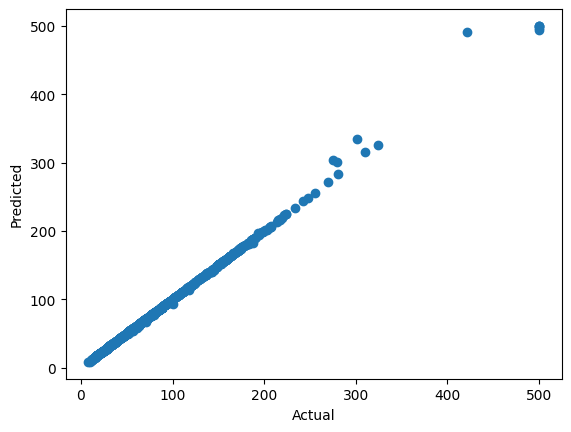

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='AQI_Value'>

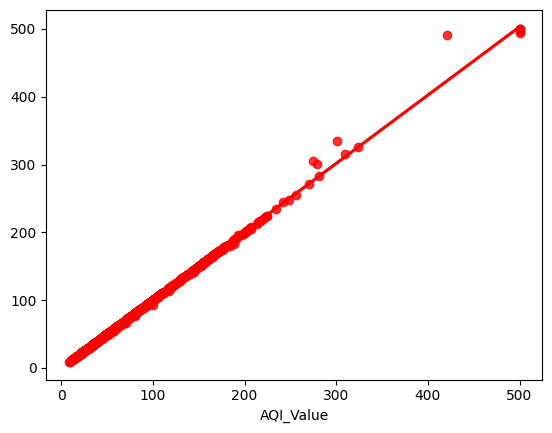

In [91]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [92]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11822,38,38.000,0.000
7379,150,150.000,0.000
6494,157,157.000,0.000
8749,58,58.000,0.000
5129,156,156.000,0.000
...,...,...,...
14332,52,52.000,0.000
83,23,23.000,0.000
11955,129,128.990,0.010
16051,203,202.058,0.942
